<a href="https://colab.research.google.com/github/Santiago8888/Kin/blob/master/Job_s_PCA_V1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup Environment

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive/Dzeta

In [0]:
import json
with open('Data/angel_V1.json') as json_file:
    data = json.load(json_file)

In [0]:
import pandas as pd
df = pd.DataFrame.from_records(data[1:], columns=data[0])

In [0]:
descriptions = df['description'].tolist()
descriptions = sum(descriptions, [])

In [8]:
import nltk
import torch
import pandas as pd

import numpy as np
from sklearn.cluster import KMeans

!pip install nmslib 
import nmslib

nltk.download('punkt')

     |████████████████████████████████| 13.0MB 320kB/s 
     |████████████████████████████████| 296kB 51.5MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
cd NLP

/content/gdrive/My Drive/Dzeta/NLP


In [10]:
from InferSent.models import InferSent
model_version = 2
MODEL_PATH = "encoder/infersent%s.pkl" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048, 'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}

model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = 'fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)
model.build_vocab(descriptions, tokenize=True)
embeddings = model.encode(sentences=descriptions, tokenize=True)


Found 3245(/3486) words with w2v vectors
Vocab size : 3245


In [14]:
df.describe()

,id,date,minSalary,maxSalary,minEquity,maxEquity,salary,equity,locationsIdx,applicantsIdx,jobsIdx,isPound,isEuro
count,8.300000e+01,8.300000e+01,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,4.066884e+06,1.573491e+09,0.237070,0.253202,0.044400,0.078217,0.245729,0.066945,1.277108,31.481928,2.469880,0.144578,0.072289
std,2.476070e+06,1.570184e+07,0.167929,0.196964,0.131052,0.142226,0.177761,0.134606,1.192591,63.650218,1.921238,0.353813,0.260540
min,2.777300e+04,1.508388e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.573026e+06,1.560841e+09,0.131098,0.052632,0.000000,0.000000,0.081921,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,4.399507e+06,1.582071e+09,0.207317,0.263158,0.001000,0.015000,0.265537,0.013333,1.000000,10.000000,2.000000,0.000000,0.000000
75%,6.153710e+06,1.585310e+09,0.283537,0.421053,0.020000,0.100000,0.343220,0.073333,1.500000,32.000000,3.000000,0.000000,0.000000
max,7.591107e+06,1.585902e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,365.000000,10.000000,1.000000,1.000000


In [0]:
df["minSalary"] = ((df["minSalary"]-df["minSalary"].min())/(df["minSalary"].max()-df["minSalary"].min()))
df["maxSalary"] = ((df["maxSalary"]-df["maxSalary"].min())/(df["maxSalary"].max()-df["maxSalary"].min()))
df["minEquity"] = ((df["minEquity"]-df["minEquity"].min())/(df["minEquity"].max()-df["minEquity"].min()))
df["maxEquity"] = ((df["maxEquity"]-df["maxEquity"].min())/(df["maxEquity"].max()-df["maxEquity"].min()))
df["salary"] = ((df["salary"]-df["salary"].min())/(df["salary"].max()-df["salary"].min()))
df["equity"] = ((df["equity"]-df["equity"].min())/(df["equity"].max()-df["equity"].min()))


In [0]:
df['isPound'] = df['compensation'].str.contains('£')*1
df['isEuro'] = df['compensation'].str.contains('€')*1


In [21]:
df.head()

,provider,id,description,date,datePosted,location,title,link,minSalary,maxSalary,minEquity,maxEquity,salary,equity,compensation,name,logo,pitch,size,locationsIdx,applicantsIdx,jobsIdx,isPound,isEuro,Coords,latitude,longitude
0,Angel.co,6243347,[Ubico provides an AI-powered lead engagement ...,1581106732,2020-02-07T20:18:52.000Z,Montreal,Full-Stack Engineer,https://angel.co/company/ubico-mtl/jobs,0.085366,0.026316,0.10,0.150,0.053672,0.133333,$50k – $65k • 0.5% – 1.5%,Ubico,https://photos.angel.co/startups/i/6243347-703...,AI-Powered Lead Engagement Platform,SIZE_11_50,1,3,4,0,0,"[45.4972159, -73.6103642]",0.747266,0.208632
1,Angel.co,2742580,[Only applications submitted via https://jobs....,1555718139,2019-04-19T23:55:39.000Z,San Francisco,Software Engineer,https://angel.co/company/roger-ai-1/jobs,0.207317,0.421053,0.00,0.010,0.322034,0.006667,$70k – $140k • 0.0% – 0.1%,Roger,https://photos.angel.co/startups/i/2742580-01a...,Accounting automation tool for SMBs and Accoun...,SIZE_11_50,0,26,0,0,0,"[37.7790262, -122.4199061]",0.498857,0.002925
2,Angel.co,5716138,"[**About Odyssean**\r, With over 50 years of c...",1585377380,2020-03-28T06:36:20.000Z,Remote,Backend Engineer,https://angel.co/company/odyssean/jobs,0.146341,0.263158,0.40,0.500,0.209040,0.466667,$60k – $110k • 2.0% – 5.0%,Odyssean,https://photos.angel.co/startups/i/5716138-fe3...,"Market making, trading, and digital asset mana...",SIZE_1_10,7,167,3,0,0,"[None, None]",NaN,NaN
3,Angel.co,5716138,"[**About Odyssean**\r, Odyssean is a digital a...",1585376095,2020-03-28T06:14:55.000Z,New York City,CTO,https://angel.co/company/odyssean/jobs,0.573171,0.684211,1.00,1.000,0.632768,1.000000,$130k – $190k • 5.0% – 10.0%,Odyssean,https://photos.angel.co/startups/i/5716138-fe3...,"Market making, trading, and digital asset mana...",SIZE_1_10,7,167,3,0,0,"[40.7127281, -74.0060152]",0.593278,0.206965
4,Angel.co,233847,[We are seeking motivated developers who are p...,1551993244,2019-03-07T21:14:04.000Z,Houston,Software Engineer,https://angel.co/company/harvest-exchange/jobs,0.390244,0.315789,0.02,0.025,0.350282,0.023333,$100k – $120k • 0.1% – 0.25%,Harvest Exchange,https://photos.angel.co/startups/i/233847-bc53...,Helping Investors Grow,SIZE_11_50,2,2,2,0,0,"[29.7589382, -95.3676974]",0.240731,0.116936


In [0]:
df_locations = df.location.unique()

In [0]:
with open('Data/locations.json') as json_file:
    locations = json.load(json_file)

In [0]:
df['Coords'] = [[locations[d][0], locations[d][1]] for d in df['location']]
df['latitude'] = [locations[d][0] for d in df['location']]
df['longitude'] = [locations[d][1] for d in df['location']]

In [0]:
df["latitude"] = ((df["latitude"]-df["latitude"].min())/(df["latitude"].max()-df["latitude"].min()))
df["longitude"] = ((df["longitude"]-df["longitude"].min())/(df["longitude"].max()-df["longitude"].min()))

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


In [0]:
def pca_on_column(col):
  embeddings = model.encode(sentences=df[col], tokenize=True)
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(embeddings)
  y = kmeans.fit_predict(embeddings)

  c1 = [x for idx, x in enumerate(df[col]) if y[idx] == 0]
  c2 = [x for idx, x in enumerate(df[col]) if y[idx] == 1]
  c3 = [x for idx, x in enumerate(df[col]) if y[idx] == 2]
  print('Clusters Size:', len(c1), len(c2), len(c3))

  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(embeddings)

  pca_df = pd.DataFrame.from_records(principalComponents, columns=['PC1', 'PC2'])
  pca_df[col] = df[col]
  pca_df['cluster'] = y
  print(pca_df.head())

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('PC1', fontsize = 15)
  ax.set_ylabel('PC2', fontsize = 15)
  ax.set_title(f'{col.capitalize()} PCA', fontsize = 20)
  targets = [0, 1, 2]
  colors = ['r', 'g', 'b']

  for target, color in zip(targets,colors):
      indicesToKeep = pca_df['cluster'] == target
      ax.scatter(pca_df.loc[indicesToKeep, 'PC1'], pca_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
  ax.legend(targets)
  ax.grid()

  return pca_df



Clusters Size: 25 26 32
        PC1       PC2                title  cluster
0 -0.866655  0.045772  Full-Stack Engineer        0
1  0.524809 -0.690799    Software Engineer        2
2  0.053078  0.314273     Backend Engineer        1
3  0.777959  0.580108                  CTO        2
4  0.524809 -0.690799    Software Engineer        2


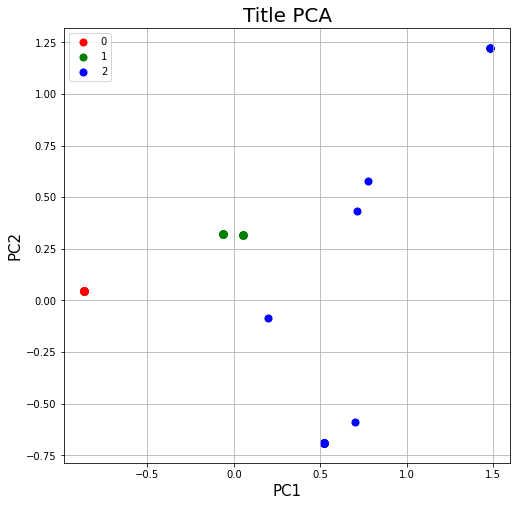

In [24]:
titles_df = pca_on_column('title')

Clusters Size: 27 48 8
        PC1  ...  cluster
0  1.145969  ...        1
1 -0.254795  ...        1
2 -0.914760  ...        0
3 -0.914760  ...        0
4  3.529583  ...        2

[5 rows x 4 columns]


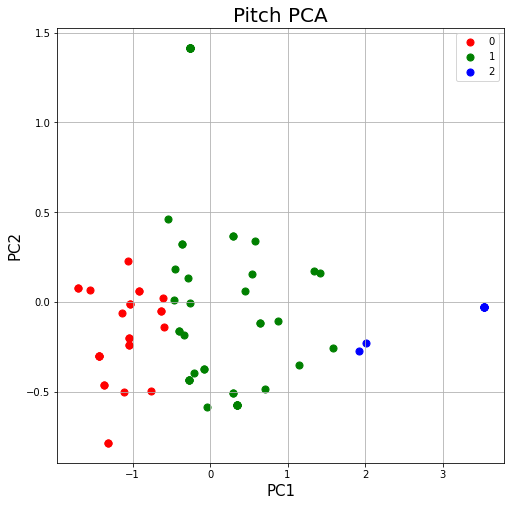

In [34]:
df['pitch'] = df['pitch'].fillna('')
pitch_df = pca_on_column('pitch')


In [0]:
embeddings = model.encode(sentences=descriptions, tokenize=True)
kmeans = KMeans(n_clusters=3)
kmeans.fit(embeddings)
y = kmeans.fit_predict(embeddings)

l1 = len([x for idx, x in enumerate(descriptions) if y[idx] == 0])
l2 = len([x for idx, x in enumerate(descriptions) if y[idx] == 1])
l3 = len([x for idx, x in enumerate(descriptions) if y[idx] == 2])

l = [l1, l2, l3]
i = l.index(max(l))
desc_c = [x for idx, x in enumerate(descriptions) if y[idx] == i]


Clusters Size: 40 9 34
        PC1  ...  cluster
0  0.034371  ...        2
1  2.200183  ...        1
2 -0.851402  ...        0
3 -0.967403  ...        0
4 -0.878603  ...        0

[5 rows x 4 columns]


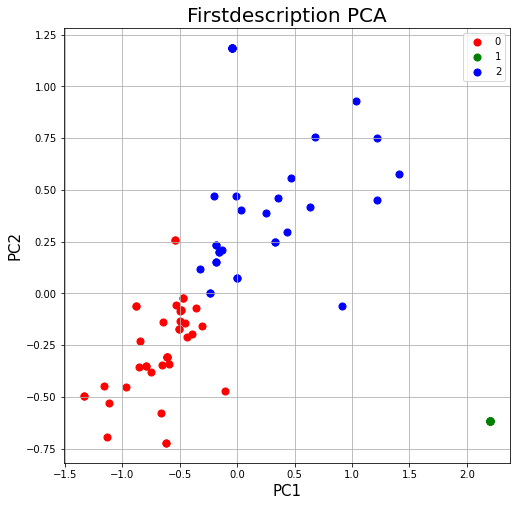

In [39]:
new_descriptions = [[idx, word] for idx, sentence in enumerate(df.description) for word in sentence if word in desc_c]
first_descriptions = [[x for x in new_descriptions if x[0] == i][0] for i in range(83)]
df['firstDescription'] = [x[1] for x in first_descriptions]
pca_firstDesc = pca_on_column('firstDescription')

In [0]:
df['full_description'] = ['. '.join(df.description[i]) for i in range(len(df))]
with open('Data/tech.json') as json_file: tech = json.load(json_file)

In [42]:
import re
tech_count = [[len([m.start() for m in re.finditer(tech[i].lower(), df.full_description[j].lower())]) for i in range(len(tech))] for j in range(len(df))]
tech_count = np.array(tech_count)
pca = PCA(n_components=5)
tech_count = pca.fit_transform(tech_count)

[591, 1132, 2247]

In [0]:
def plot_with_pca(data):
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(data)
  y = kmeans.fit_predict(data)

  c1 = [x for idx, x in enumerate(data) if y[idx] == 0]
  c2 = [x for idx, x in enumerate(data) if y[idx] == 1]
  c3 = [x for idx, x in enumerate(data) if y[idx] == 2]
  print('Clusters Size:', len(c1), len(c2), len(c3))

  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(data)

  pca_df = pd.DataFrame.from_records(principalComponents, columns=['PC1', 'PC2'])
  pca_df['cluster'] = y
  print(pca_df.head())

  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('PC1', fontsize = 15)
  ax.set_ylabel('PC2', fontsize = 15)
  ax.set_title('PCA', fontsize = 20)
  targets = [0, 1, 2]
  colors = ['r', 'g', 'b']

  for target, color in zip(targets,colors):
      indicesToKeep = pca_df['cluster'] == target
      ax.scatter(pca_df.loc[indicesToKeep, 'PC1'], pca_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
  ax.legend(targets)
  ax.grid()

  return pca_df

Clusters Size: 49 15 19
        PC1       PC2  cluster
0  1.762547  3.161378        2
1  6.328483 -2.808903        1
2 -3.409240  0.815153        0
3 -1.390099  0.402187        0
4 -1.937451 -0.164510        0


,PC1,PC2,cluster
0,1.762547,3.161378,2
1,6.328483,-2.808903,1
2,-3.409240,0.815153,0
3,-1.390099,0.402187,0
4,-1.937451,-0.164510,0
...,...,...,...
78,-2.927710,-1.143118,0
79,-0.153674,-1.717748,0
80,4.447345,-1.875318,1
81,-2.125442,-0.607671,0


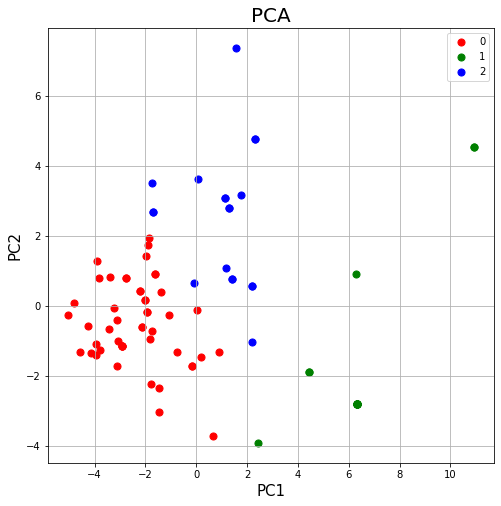

In [74]:
plot_with_pca(tech_count)